# Military Aircraft Detection

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np


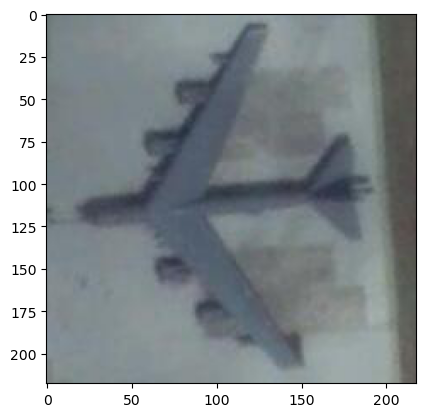

In [2]:
# We define our train and test image paths
train_files_path = "/Users/merveayaz/Desktop/airplanedataset/Train"
test_files_path = "/Users/merveayaz/Desktop/airplanedataset/Test"

#loading any airplane image from our dataset
img = load_img(test_files_path + "/B-52/3-9.jpg")

#checking the image if we can see it correctly
plt.imshow(img)
plt.show()

In [3]:
#size of the image
print(img_to_array(img).shape)

(218, 218, 3)


## Building our test and train datasets from the directories of airplane images

In [4]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size = (224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [5]:
numberOfAirplaneTypes = 5

## Building the model

I will use Transfer Learning, VGG16 model for the project. 

In [6]:
vgg = VGG16()

In [7]:
vgg_layers = vgg.layers
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x1678f2f70>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678c18e0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678b23a0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x1678ad610>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678b2f10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x167890340>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x16789c6d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x16789ce80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678b9df0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1677d5730>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x167829910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x167829130>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678b9a00>, <keras.layers.convolutional.conv2d.Conv2D object at 0x1678b2df0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 

In [8]:
#building a new Sequential model 
vggmodel_layersize_tobe_used = len(vgg_layers) - 1 #toplam layer sayısının bir eksiği, en sondaki output layerını çıkarıyoruz
#yani gerekli olan geriye kalan görüntü tanıma layerlarını kullanmış olucaz

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [9]:
#I don't re-train the original 16 layers of VGG16
for layers in model.layers:
    layers.trainable = False


#I add my new output layer 
model.add(Dense(numberOfAirplaneTypes, activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
#compile
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [14]:
batch_size = 4

model.fit(
    train_data,
    steps_per_epoch=400 // batch_size,
    epochs=3,
    validation_data=test_data,
    validation_steps=200 // batch_size
)


Epoch 1/3


2024-06-29 20:17:34.419057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 57/100 [================>.............] - ETA: 2:39 - loss: 0.1895 - accuracy: 0.9514WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 300 batches). You may need to use the repeat() function when building your dataset.


2024-06-29 20:21:05.952129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - 223s 2s/step - loss: 0.1895 - accuracy: 0.9514 - val_loss: 0.2058 - val_accuracy: 0.9200


## preparing the aircraft photo we want to test

In [16]:
#loading and aircraft image and rescaling to 224x224
img = Image.open("/Users/merveayaz/Desktop/airplanedataset/a10.jpg").resize((224,224))

#converting to array
img = np.array(img)



In [17]:
#adding extra dimension to make 4 dimension
img = img.reshape(-1,224,224,3)

img.ndim

4

In [18]:
#scaling input pixels between -1 and 1
img = preprocess_input(img)

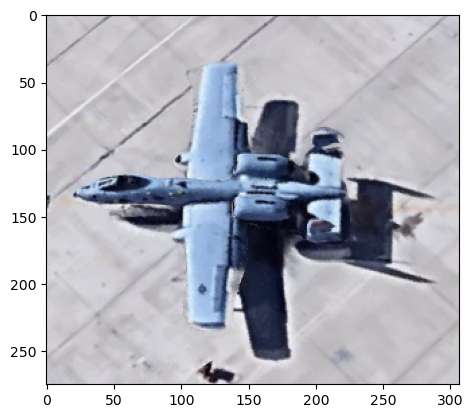

In [19]:
#the aircraft we want to test
img_for_display = load_img("/Users/merveayaz/Desktop/airplanedataset/a10.jpg")
plt.imshow(img_for_display)
plt.show()

## making prediction

In [20]:
preds = model.predict(img)
preds

1/1 [==============================] - 0s 194ms/step


array([[9.9791390e-01, 2.7365991e-04, 7.6175755e-04, 7.6187123e-04,
        2.8889556e-04]], dtype=float32)

In [22]:
#highest prediction
image_classes = ["A-10 Thunderbolt", "Boeing B-52", "Boeing E-3 Sentry", "F-22 Raptor", "KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result])

A-10 Thunderbolt
